<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/Error_Corr_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

x:  6
0 Cost:  31697.615 

15000 Cost:  2.9360156 

30000 Cost:  1.6255306 





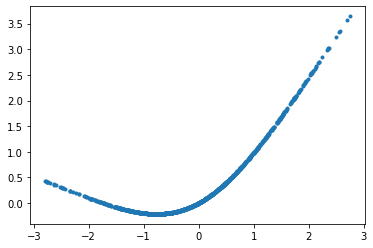

In [ ]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import torch

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
    return tf.tensordot(a1, W[1], axes = 1)

def d_neural_network_dx(W, x, k=1):
    return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

x_space = []
ye_space = []
x_number = 1
w_number = 6
step_number = 30000

for z in range(x_number):
  x = tf.Variable(tf.random_normal([1000, 1]), name = 'x')
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  ye = x * neural_network(W, x)
  yeprime = neural_network(W, x) + x * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - y))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  if z % int(x_number / 1) == 0:
    print("x: ", z)
  for step in range(step_number + 1):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, y, x, train])
    if z % int(x_number / 1) == 0:
      if step % int(step_number / 2) == 0:
          print(step, "Cost: ", cost_val, "\n")
  if z % int(x_number / 1) == 0:
    print("\n")

  x_space += list(x_val)
  ye_space += list(ye_val)

  sess.close()

plt.plot(x_space, ye_space, '.')
plt.show()

x:  0
0 Cost:  2.0998244 

15000 Cost:  0.94451314 

30000 Cost:  0.6519306 





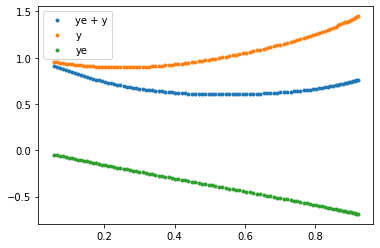

In [75]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import torch

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
    return tf.tensordot(a1, W[1], axes = 1)

def d_neural_network_dx(W, x, k=1):
    return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

x_space = []
y_space = []
ye_space = []
corr_space = []
x_number = 1
w_number = 6
step_number = 30000

for z in range(x_number):
  x = tf.Variable(np.array([[i/100] for i in range(0, 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  ye = x * neural_network(W, x)
  yeprime = neural_network(W, x) + x * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - y))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  if z % int(x_number / 1) == 0:
    print("x: ", z)
  for step in range(step_number + 1):
    for i in range(1, w_number + 1):
        globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
    cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, y, x, train])
    if z % int(x_number / 1) == 0:
      if step % int(step_number / 2) == 0:
          print(step, "Cost: ", cost_val, "\n")
  if z % int(x_number / 1) == 0:
    print("\n")

  x_space += list(x_val)
  corr_space += list(ye_val + y_val)
  y_space += list(y_val)
  ye_space += list(ye_val)

  sess.close()

plt.plot(x_space, corr_space, '.', label = 'ye + y')
plt.plot(x_space, y_space, '.', label = 'y')
plt.plot(x_space, ye_space, '.', label = 'ye')
plt.legend()
plt.show()